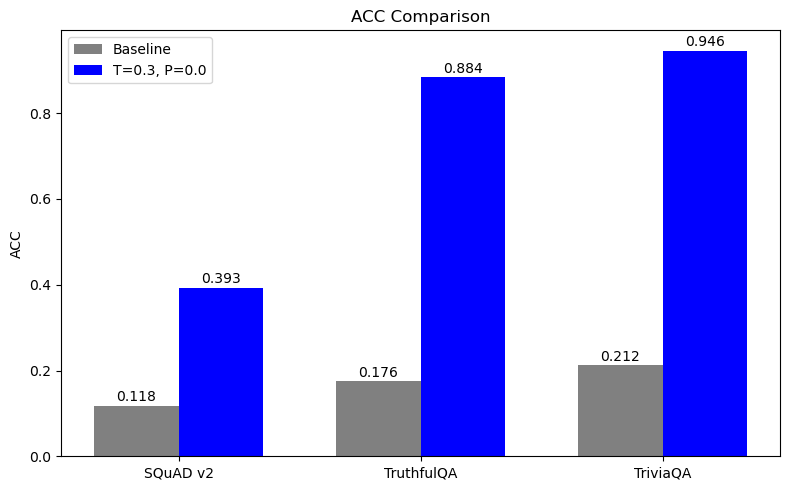

Takeaway (ACC):
  SQuAD v2: Improved by 0.275
  TruthfulQA: Improved by 0.708
  TriviaQA: Improved by 0.734

--------------------------------------------------



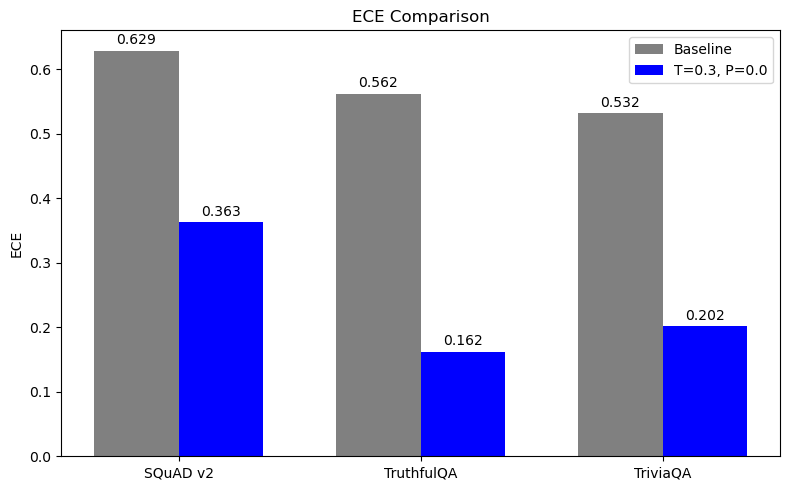

Takeaway (ECE):
  SQuAD v2: Decreased by -0.266
  TruthfulQA: Decreased by -0.400
  TriviaQA: Decreased by -0.330

--------------------------------------------------



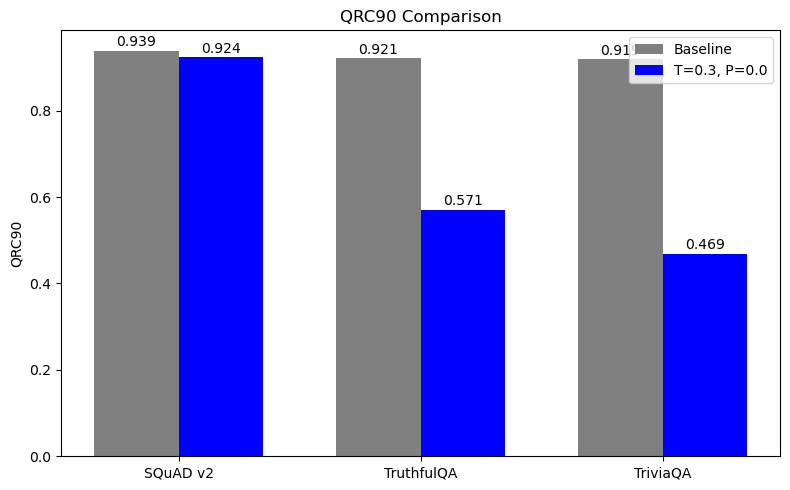

Takeaway (QRC90):
  SQuAD v2: Decreased by -0.015
  TruthfulQA: Decreased by -0.350
  TriviaQA: Decreased by -0.450

--------------------------------------------------



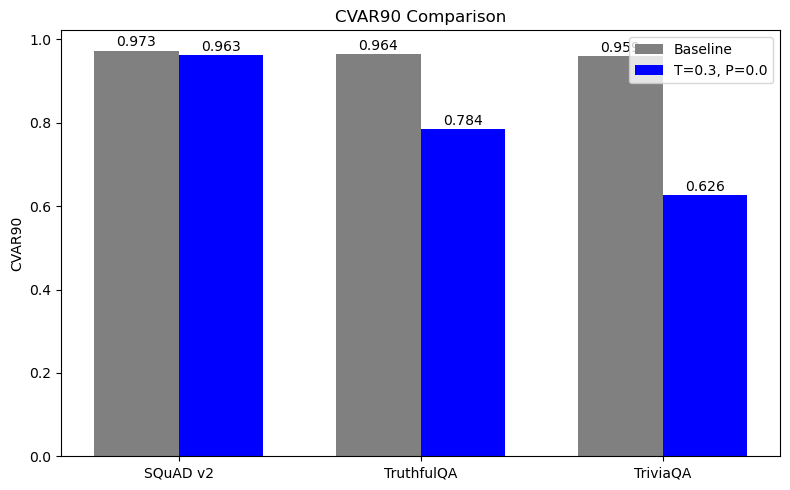

Takeaway (CVAR90):
  SQuAD v2: Decreased by -0.010
  TruthfulQA: Decreased by -0.180
  TriviaQA: Decreased by -0.333

--------------------------------------------------



In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Datasets
datasets = ['SQuAD v2', 'TruthfulQA', 'TriviaQA']

# Metrics
metrics = ['acc', 'ece', 'qrc90', 'cvar90']

# Baseline
baseline = {
    'SQuAD v2': {'acc': 0.118, 'ece':0.629, 'qrc90':0.939, 'cvar90':0.973},
    'TruthfulQA': {'acc':0.176, 'ece':0.562, 'qrc90':0.921, 'cvar90':0.964},
    'TriviaQA': {'acc':0.212, 'ece':0.532, 'qrc90':0.919, 'cvar90':0.959}
}

# Modification T=0.3, P=0.0
mod_T03_P00 = {
    'SQuAD v2': {'acc':0.393, 'ece':0.363, 'qrc90':0.924, 'cvar90':0.963},
    'TruthfulQA': {'acc':0.884, 'ece':0.162, 'qrc90':0.571, 'cvar90':0.784},
    'TriviaQA': {'acc':0.946, 'ece':0.202, 'qrc90':0.469, 'cvar90':0.626}
}

# Function to plot a metric comparison
def plot_metric(metric_name, baseline, modified, datasets):
    baseline_vals = [baseline[d][metric_name] for d in datasets]
    modified_vals = [modified[d][metric_name] for d in datasets]

    x = np.arange(len(datasets))
    width = 0.35

    fig, ax = plt.subplots(figsize=(8,5))
    bars1 = ax.bar(x - width/2, baseline_vals, width, label='Baseline', color='gray')
    bars2 = ax.bar(x + width/2, modified_vals, width, label='T=0.3, P=0.0', color='blue')

    ax.set_ylabel(metric_name.upper())
    ax.set_title(f'{metric_name.upper()} Comparison')
    ax.set_xticks(x)
    ax.set_xticklabels(datasets)
    ax.legend()
    
    # Annotate bars
    for b1, b2 in zip(bars1, bars2):
        ax.text(b1.get_x() + b1.get_width()/2, b1.get_height()+0.01, f'{b1.get_height():.3f}', ha='center')
        ax.text(b2.get_x() + b2.get_width()/2, b2.get_height()+0.01, f'{b2.get_height():.3f}', ha='center')

    plt.tight_layout()
    plt.show()

    # Takeaway text
    print(f"Takeaway ({metric_name.upper()}):")
    for d in datasets:
        diff = modified[d][metric_name] - baseline[d][metric_name]
        print(f"  {d}: {'Improved' if diff > 0 else 'Decreased' if diff < 0 else 'No change'} by {diff:.3f}")
    print("\n" + "-"*50 + "\n")

# Plot for all metrics
for m in metrics:
    plot_metric(m, baseline, mod_T03_P00, datasets)


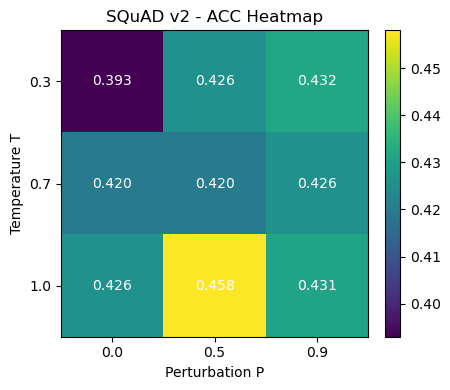

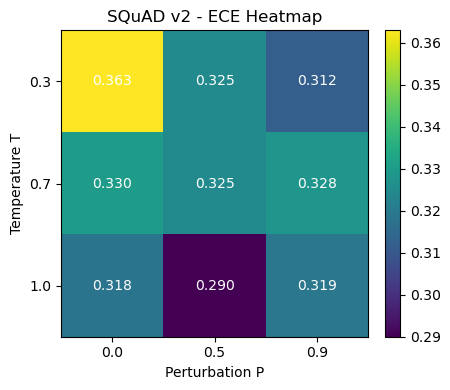

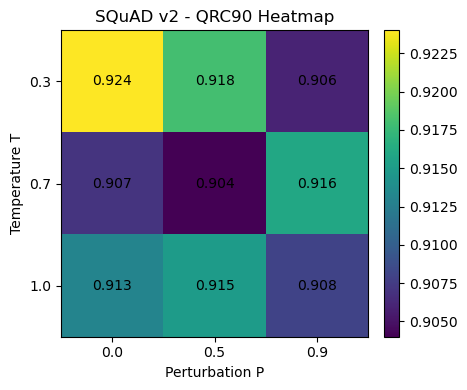

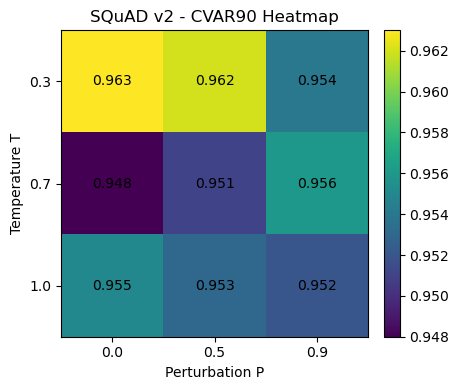

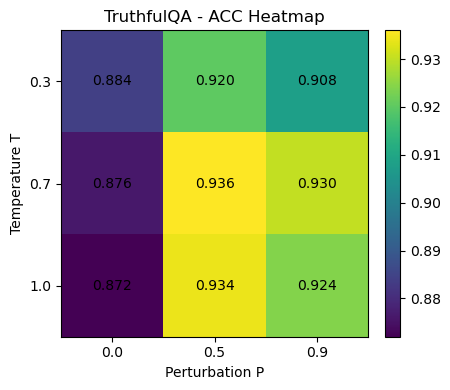

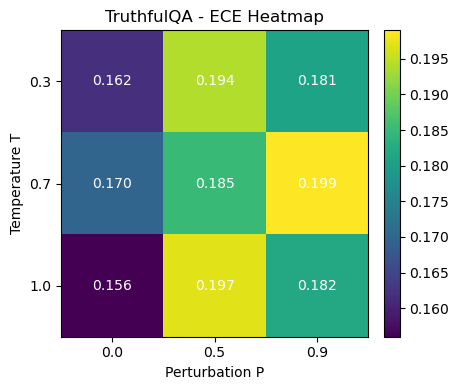

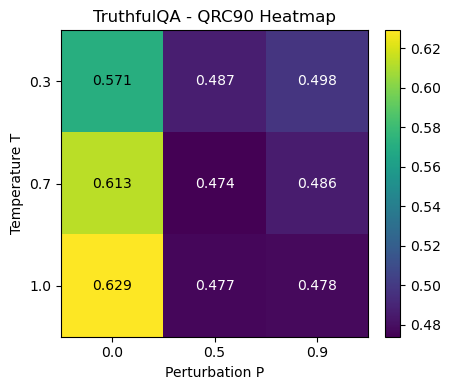

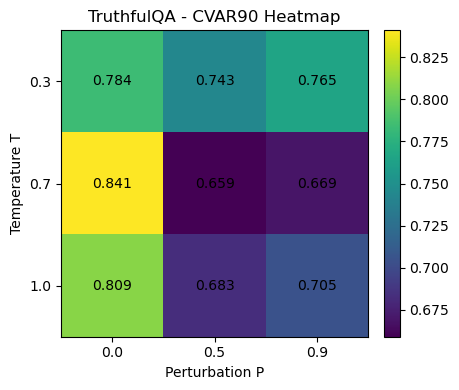

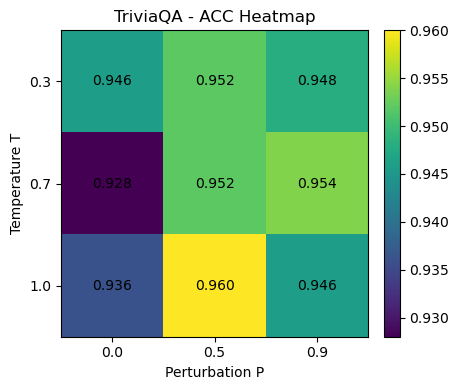

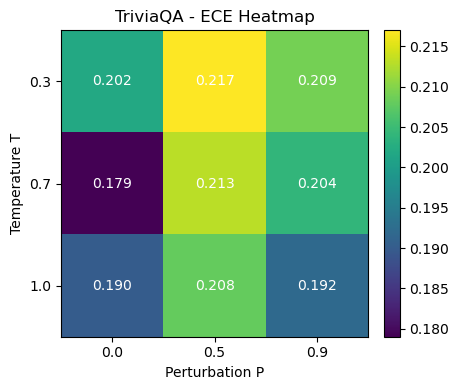

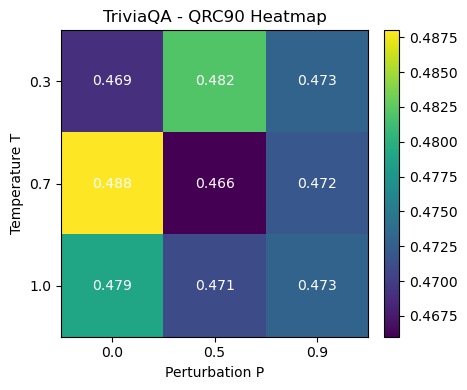

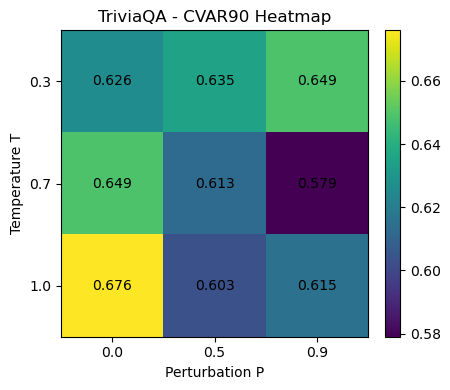

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Datasets and metrics
datasets = ['SQuAD v2', 'TruthfulQA', 'TriviaQA']
metrics = ['acc', 'ece', 'qrc90', 'cvar90']

# T and P values
T_values = [0.3, 0.7, 1.0]
P_values = [0.0, 0.5, 0.9]

# Modification results
results = {
    'SQuAD v2': {
        (0.3, 0.0): {'acc':0.393, 'ece':0.363, 'qrc90':0.924, 'cvar90':0.963},
        (0.3, 0.5): {'acc':0.426, 'ece':0.325, 'qrc90':0.918, 'cvar90':0.962},
        (0.3, 0.9): {'acc':0.432, 'ece':0.312, 'qrc90':0.906, 'cvar90':0.954},
        (0.7, 0.0): {'acc':0.420, 'ece':0.330, 'qrc90':0.907, 'cvar90':0.948},
        (0.7, 0.5): {'acc':0.420, 'ece':0.325, 'qrc90':0.904, 'cvar90':0.951},
        (0.7, 0.9): {'acc':0.426, 'ece':0.328, 'qrc90':0.916, 'cvar90':0.956},
        (1.0, 0.0): {'acc':0.426, 'ece':0.318, 'qrc90':0.913, 'cvar90':0.955},
        (1.0, 0.5): {'acc':0.458, 'ece':0.290, 'qrc90':0.915, 'cvar90':0.953},
        (1.0, 0.9): {'acc':0.431, 'ece':0.319, 'qrc90':0.908, 'cvar90':0.952}
    },
    'TruthfulQA': {
        (0.3, 0.0): {'acc':0.884, 'ece':0.162, 'qrc90':0.571, 'cvar90':0.784},
        (0.3, 0.5): {'acc':0.920, 'ece':0.194, 'qrc90':0.487, 'cvar90':0.743},
        (0.3, 0.9): {'acc':0.908, 'ece':0.181, 'qrc90':0.498, 'cvar90':0.765},
        (0.7, 0.0): {'acc':0.876, 'ece':0.170, 'qrc90':0.613, 'cvar90':0.841},
        (0.7, 0.5): {'acc':0.936, 'ece':0.185, 'qrc90':0.474, 'cvar90':0.659},
        (0.7, 0.9): {'acc':0.930, 'ece':0.199, 'qrc90':0.486, 'cvar90':0.669},
        (1.0, 0.0): {'acc':0.872, 'ece':0.156, 'qrc90':0.629, 'cvar90':0.809},
        (1.0, 0.5): {'acc':0.934, 'ece':0.197, 'qrc90':0.477, 'cvar90':0.683},
        (1.0, 0.9): {'acc':0.924, 'ece':0.182, 'qrc90':0.478, 'cvar90':0.705}
    },
    'TriviaQA': {
        (0.3, 0.0): {'acc':0.946, 'ece':0.202, 'qrc90':0.469, 'cvar90':0.626},
        (0.3, 0.5): {'acc':0.952, 'ece':0.217, 'qrc90':0.482, 'cvar90':0.635},
        (0.3, 0.9): {'acc':0.948, 'ece':0.209, 'qrc90':0.473, 'cvar90':0.649},
        (0.7, 0.0): {'acc':0.928, 'ece':0.179, 'qrc90':0.488, 'cvar90':0.649},
        (0.7, 0.5): {'acc':0.952, 'ece':0.213, 'qrc90':0.466, 'cvar90':0.613},
        (0.7, 0.9): {'acc':0.954, 'ece':0.204, 'qrc90':0.472, 'cvar90':0.579},
        (1.0, 0.0): {'acc':0.936, 'ece':0.190, 'qrc90':0.479, 'cvar90':0.676},
        (1.0, 0.5): {'acc':0.960, 'ece':0.208, 'qrc90':0.471, 'cvar90':0.603},
        (1.0, 0.9): {'acc':0.946, 'ece':0.192, 'qrc90':0.473, 'cvar90':0.615}
    }
}

# Function to create heatmap for a given dataset and metric
def plot_heatmap(dataset, metric):
    data = np.zeros((len(T_values), len(P_values)))
    for i, T in enumerate(T_values):
        for j, P in enumerate(P_values):
            data[i, j] = results[dataset][(T,P)][metric]
    
    fig, ax = plt.subplots(figsize=(5,4))
    im = ax.imshow(data, cmap='viridis', vmin=data.min(), vmax=data.max())
    
    # Tick labels
    ax.set_xticks(np.arange(len(P_values)))
    ax.set_yticks(np.arange(len(T_values)))
    ax.set_xticklabels(P_values)
    ax.set_yticklabels(T_values)
    ax.set_xlabel('Perturbation P')
    ax.set_ylabel('Temperature T')
    ax.set_title(f'{dataset} - {metric.upper()} Heatmap')
    
    # Annotate values
    for i in range(len(T_values)):
        for j in range(len(P_values)):
            ax.text(j, i, f'{data[i, j]:.3f}', ha='center', va='center', color='white' if data[i,j]<0.5 else 'black')
    
    fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
    plt.tight_layout()
    plt.show()
    
    # Simple takeaway
    trend = "increases" if data[-1,-1] > data[0,0] else "decreases"

# Generate all heatmaps
for dataset in datasets:
    for metric in metrics:
        plot_heatmap(dataset, metric)
